# <h3 style="color:#2E8B57;"> Handling Imbalanced Data in Customer Churn Prediction</h3>
* <p style="color:#90EE90;"> Customer churn prediction helps identify the reasons why customers stop using a company’s services. In this project, we focus on predicting customer churn in the telecom industry. We will build a deep learning model to classify whether a customer is likely to churn and evaluate its performance using precision, recall, and F1-score.

* <p style="color:#90EE90;"> Since churn datasets are often imbalanced (i.e., the number of churned customers is much smaller than the number of retained customers), we will apply various data balancing techniques to handle this issue and improve the model’s F1-score and overall performance.

</p>

### Loading dataset

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.shape

(7043, 21)

In [12]:
df.drop(columns="customerID", inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [18]:
df = df.dropna(subset='TotalCharges')

In [20]:
df['TotalCharges'] = df['TotalCharges'].astype(int)

In [22]:
df.shape

(7032, 20)

In [26]:
df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})

C:\Users\Admin\AppData\Local\Temp\ipykernel_10888\2767291496.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})


### Visuals

In [29]:
#Visualisation
tenure_churn_no = df[df.Churn==0].tenure
tenure_churn_yes = df[df.Churn==1].tenure

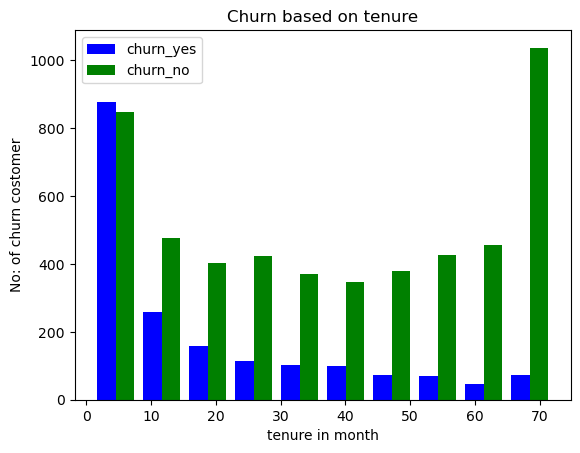

In [31]:
plt.hist([tenure_churn_yes, tenure_churn_no], color=("blue", "green"), label=("churn_yes", "churn_no"))
plt.title("Churn based on tenure")
plt.xlabel("tenure in month")
plt.ylabel("No: of churn costomer")
plt.legend()

In [33]:
MonthlyCharges_churn_no = df[df.Churn==0].MonthlyCharges
MonthlyCharges_churn_yes = df[df.Churn==1].MonthlyCharges

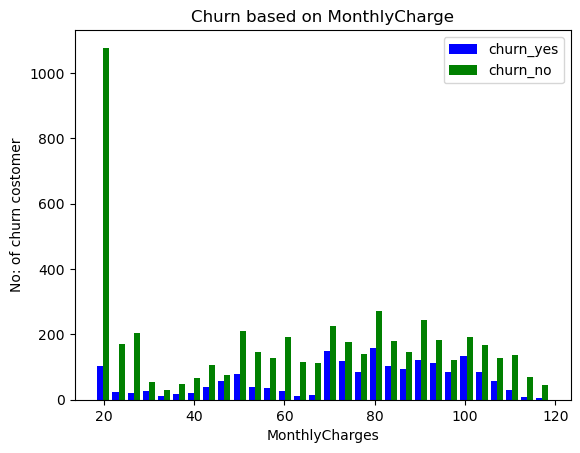

In [37]:
plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], bins=30, color=("blue", "green"), label=("churn_yes", "churn_no"))
plt.title("Churn based on MonthlyCharge")
plt.xlabel("MonthlyCharges")
plt.ylabel("No: of churn costomer")
plt.legend()

### Cleaning and Preprocessing

In [42]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,1


In [44]:
for c in df.columns:
    print(f"{c}\n{df[c].unique()}")

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29 1889  108 ..

In [46]:
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service':0,'Yes':1, 'No':0})


C:\Users\Admin\AppData\Local\Temp\ipykernel_10888\3888365857.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MultipleLines'] = df['MultipleLines'].replace({'No phone service':0,'Yes':1, 'No':0})


In [48]:
df['gender'] = df['gender'].replace({'Male':1, 'Female':0})

C:\Users\Admin\AppData\Local\Temp\ipykernel_10888\1484103698.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male':1, 'Female':0})


In [50]:
yes_no_columns = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df[yes_no_columns] = df[yes_no_columns].replace({'Yes':1, 'No':0, 'No internet service':0})

C:\Users\Admin\AppData\Local\Temp\ipykernel_10888\4052950226.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_columns] = df[yes_no_columns].replace({'Yes':1, 'No':0, 'No internet service':0})


In [52]:
one_hot_encoding_col = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=one_hot_encoding_col, dtype='int')

In [54]:
#Scalling
from sklearn.preprocessing import MinMaxScaler
scale_col = ["tenure", "MonthlyCharges", "TotalCharges"]
# Create the scaler
scaler = MinMaxScaler()
# Fit and transform
df[scale_col] = scaler.fit_transform(df[scale_col])

In [55]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


### Cleaning is over Now spliting dataset in train-test

In [60]:
X = df.drop(columns='Churn')
y = df['Churn']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [64]:
X_train.shape

(5625, 26)

In [66]:
X_test.shape

(1407, 26)

### ANN Model

In [74]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [265]:
def ANN(X_train, X_test, y_train, y_test, loss,weights):
    
    model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
              loss=loss,
            metrics=['accuracy']
    )
    

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [167]:
y_prediction = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7668 - loss: 0.4891
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.4299
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: 0.4220
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.4187
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.4168
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8062 - loss: 0.4159
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.4145
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.4147
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 0.4129
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8060 - loss: 0.4119
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.4112
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

### <p style="color:orange;"> Here, we observe the problem of data imbalance. Although the model’s overall accuracy appears good, its performance on the minority class (class 1) is poor. The precision, recall, and F1-score for this class are significantly lower, indicating that the model fails to correctly identify churned customers despite a seemingly high accuracy.
</p>

| Class | Precision | Recall | F1-Score | Support |
|:------|:-----------:|:--------:|:----------:|:---------:|
| 0 | 0.85 | 0.88 | 0.87 | 1033 |
| <span style="color:red; font-weight:bold;">1</span> | <span style="color:red;">0.64</span> | <span style="color:red;">0.57</span> | <span style="color:red;">0.60</span> | <span style="color:red;">374</span> |
| **Accuracy** |  |  | <span style="color:blue; font-weight:bold;">0.80</span> | **1407** |
| **Macro Avg** | 0.74 | 0.73 | 0.74 | 1407 |
| **Weighted Avg** | 0.79 | 0.80 | 0.80 | 1407 |


#### Now using resampling technique to tackle this problem
reference - https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets

##### Method-1 Under Sampling

In [187]:
#class Count
df1 = df.copy()
print(df1.Churn.value_counts())

#divide by class
df_class_0 = df1[df1['Churn']==0]
df_class_1 = df1[df1['Churn']==1]

Churn
0    5163
1    1869
Name: count, dtype: int64


In [207]:
# Undersampling 0 class and concat
df_class_0_under = df_class_0.sample(len(df_class_1))
df_under = pd.concat([df_class_1, df_class_0_under], axis=0)

In [219]:
df_under.shape

(3738, 27)

In [221]:
#Train test split
X = df_under.drop(columns='Churn', axis=1)
y = df_under['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [225]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [231]:
y_pred = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6803 - loss: 0.6216
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7562 - loss: 0.5318
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7669 - loss: 0.5075
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7659 - loss: 0.4975
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7682 - loss: 0.4922
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7676 - loss: 0.4890
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7635 - loss: 0.4874
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7716 - loss: 0.4846
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.4841
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 0.4838
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7746 - loss: 0.4816
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

Check classification report above. f1-score for minority class 1 improved from 0.60 to 0.71. Score for class 0 reduced to 0.70 from 0.87 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

##### Method-2 oversampling

In [252]:
# oversampling class 1
# Duplicate random rows to make dataset larger
df_class_1_over = df_class_1.sample(n=len(df_class_0), replace=True, random_state=42)

# Combine
df_over = pd.concat([df_class_1_over, df_class_0], ignore_index=True)

In [254]:
df_over.shape

(10326, 27)

In [258]:
#Train test split
X = df_over.drop(columns='Churn', axis=1)
y = df_over['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [262]:
y_train.value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

In [264]:
y_pred = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6745 - loss: 0.5941
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7604 - loss: 0.5001
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7634 - loss: 0.4897
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7665 - loss: 0.4841
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7672 - loss: 0.4806
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7683 - loss: 0.4778
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7699 - loss: 0.4757
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7696 - loss: 0.4736
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7703 - loss: 0.4720
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7714 - loss: 0.4707
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7719 - loss: 0.4685
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Check classification report above. f1-score for minority class 1 improved from 0.60 to 0.78. Score for class 0 reduced to 0.75 from 0.87 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

#### Method 3 SMOTE(Synthetic Minority Oversampling Technique)

In [270]:
!pip install imbalanced-learn

In [293]:
X = df1.drop(columns='Churn', axis=1)
y = df1['Churn']

In [295]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [297]:
# Assuming you already have your train-test split
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X, y)


In [299]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled
)

In [303]:
y_train.value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

In [307]:
y_pred = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7081 - loss: 0.5586
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7792 - loss: 0.4722
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7816 - loss: 0.4651
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7833 - loss: 0.4602
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7834 - loss: 0.4576
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7849 - loss: 0.4552
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7852 - loss: 0.4524
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7866 - loss: 0.4504
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7886 - loss: 0.4479
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7893 - loss: 0.4459
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7914 - loss: 0.4440
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

SMOT Oversampling increases f1 score of minority class 1 from 0.60 to 0.82 (huge improvement) Also over all accuracy improves from 0.78 to 0.81

#### Method-4 Use of ensembles with undersampling

In [311]:
df1.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [313]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [317]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [319]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [321]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [323]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train 

In [327]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, X_test,y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6729 - loss: 0.6105
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7562 - loss: 0.5173
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7615 - loss: 0.4984
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7666 - loss: 0.4921
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7682 - loss: 0.4890
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 0.4868
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7716 - loss: 0.4848
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7692 - loss: 0.4843
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 0.4831
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7696 - loss: 0.4821
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.4809
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7736 - lo

In [331]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train,  X_test,y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6679 - loss: 0.6231
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7495 - loss: 0.5338
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7609 - loss: 0.5063
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7629 - loss: 0.4964
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7649 - loss: 0.4899
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7662 - loss: 0.4859
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7669 - loss: 0.4832
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7629 - loss: 0.4808
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7679 - loss: 0.4791
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7702 - loss: 0.4785
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 0.4759
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7692 - lo

In [335]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train,  X_test,y_train, y_test, 'binary_crossentropy', -1)

Epoch 1/100


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6937 - loss: 0.6160
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7567 - loss: 0.5331
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7670 - loss: 0.5029
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7685 - loss: 0.4911
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7731 - loss: 0.4848
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7753 - loss: 0.4803
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7780 - loss: 0.4779
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7757 - loss: 0.4760
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7757 - loss: 0.4740
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7757 - loss: 0.4730
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7799 - loss: 0.4714
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7757 - lo

After applying After applying SMOTE, the F1-score for the minority class (1) improved from 0.60 to 0.62. Although the F1-score for the majority class (0) slightly decreased from 0.85 to 0.80, the model now shows a better balance in predictive performance across both classes., the F1-score for the minority class (1) improved from 0.57 to 0.62. Although the F1-score for the majority class (0) slightly decreased from 0.85 to 0.80, the model now shows a better balance in predictive performance across both classes.